# Exploring the data

In [1]:
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [2]:
from sys import path
from os.path import abspath

path.insert(0, abspath('../src'))
import mylib.cleaning as clean
import mylib.exploring as explore

In [3]:
pd.options.display.max_columns = None

#### Load config

In [4]:
with open('../params.yaml') as file:
    config = yaml.safe_load(file)

#### Read cleaned dataset

In [5]:
data = pd.read_csv(config['data']['clean'])
data.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfied
0,70172,M,Loyal,13,Private,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,False
1,5047,M,Disloyal,25,Business,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,False
2,110028,F,Loyal,26,Business,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,True
3,24026,F,Loyal,25,Business,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,False
4,119299,M,Loyal,61,Business,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,True


#### Select all columns containing a rating (0-5)

In [6]:
rate_cols = ['inflight_wifi_service', 'departure_arrival_time_convenient',
             'ease_of_online_booking', 'gate_location', 'food_and_drink',
             'online_boarding', 'seat_comfort', 'inflight_entertainment',
             'on_board_service', 'leg_room_service', 'baggage_handling',
             'checkin_service', 'inflight_service', 'cleanliness']

### Prepare dataset for exploration
Before deeper exploring the dataset, let's add some useful columns...

#### Create column 'rating_sum' with the sum of all ratings of a certain passenger

In [7]:
data['rating_avg'] = data[rate_cols].mean(axis=1)

#### Create column 'flight_distance_class' from column 'flight_distance'
<pre>
  0-1000km    => 'short'
  1000-3000km => 'medium'
  >3000km     => 'long'
</pre>

In [8]:
def get_flight_distance_class(val):
    if val < 1000:
        return "short"
    elif val < 3000:
        return "medium"
    else:
        return "long"

In [9]:
data['flight_distance_class'] = data['flight_distance'].apply(get_flight_distance_class)

#### Create column 'generation' from column 'age'
<pre>
  <13 years   => 'Kid'
  13-19 years => 'Teenager'
  20-64 years => 'Adult'
  >64 years   => 'Retiree'
</pre>

In [10]:
def get_generation(val):
    if val < 13:
        return "Kid"
    elif val < 20:
        return "Teenager"
    elif val < 65:
        return "Adult"
    else:
        return "Retiree"

In [11]:
data['generation'] = data['age'].apply(get_generation)

In [12]:
data.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfied,rating_avg,flight_distance_class,generation
0,70172,M,Loyal,13,Private,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,False,3.857143,short,Teenager
1,5047,M,Disloyal,25,Business,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,False,2.285714,short,Adult
2,110028,F,Loyal,26,Business,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,True,3.714286,medium,Adult
3,24026,F,Loyal,25,Business,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,False,3.000000,short,Adult
4,119299,M,Loyal,61,Business,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,True,3.500000,short,Adult


#### Get unique values

In [13]:
explore.print_unique(data)

COLUMN id (int64)
[ 70172   5047 110028  24026 119299 111157  82113  96462  79485  65725
  34991  51412  98628  83502  95789 100580  71142 127461  70354  66246]...

COLUMN gender (object)
['M' 'F']

COLUMN customer_type (object)
['Loyal' 'Disloyal']

COLUMN age (int64)
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57]...

COLUMN type_of_travel (object)
['Private' 'Business']

COLUMN class (object)
['Eco Plus' 'Business' 'Eco']

COLUMN flight_distance (int64)
[ 460  235 1142  562  214 1180 1276 2035  853 1061 1182  308  834  946
  453  486 2123 2075 2486 1174]...

COLUMN inflight_wifi_service (int64)
[3 2 4 1 5 0]

COLUMN departure_arrival_time_convenient (int64)
[4 2 5 3 1 0]

COLUMN ease_of_online_booking (int64)
[3 2 5 4 1 0]

COLUMN gate_location (int64)
[1 3 2 5 4 0]

COLUMN food_and_drink (int64)
[5 1 2 4 3 0]

COLUMN online_boarding (int64)
[3 5 2 1 4 0]

COLUMN seat_comfort (int64)
[5 1 2 3 4 0]

COLUMN inflight_entertainment (int64)
[5 1 2 3 4 0]

COLUMN on_board_se

#### Explore distribution of categoricals

In [14]:
def plot_amount(data, h, w, fig_h=5, fig_w=5, hue=None):
    fig,ax = plt.subplots(h,w, figsize=(fig_w, fig_h))
    coli=0

    for y in range(h):
        for x in range(w):
            sx = sns.countplot(x=data[data.columns[coli]], ax=ax[y,x], hue=hue)
            sx.set(ylabel='', xlabel='', title=data.columns[coli])
            coli += 1

    plt.tight_layout()
    plt.savefig('../plots/categorical_distribution.png', dpi=300)
    plt.show()

In [15]:
sns.set_style("whitegrid", {"grid.color": ".5", "grid.linestyle": ":"})

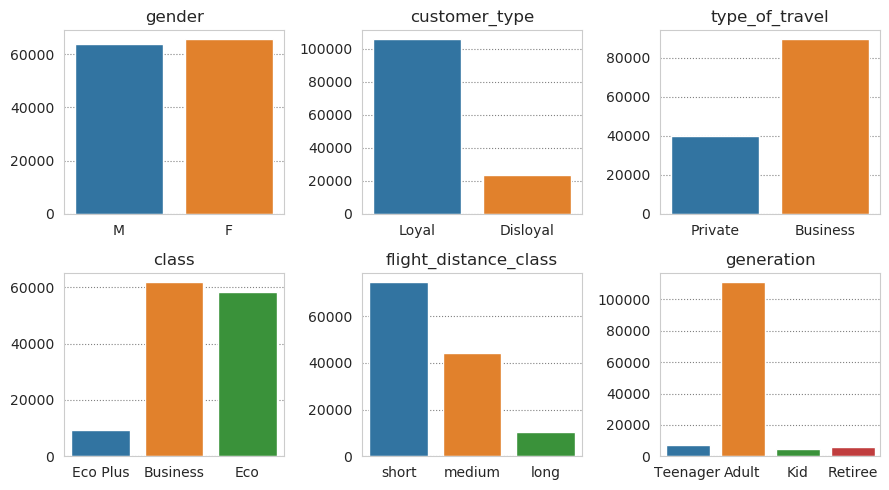

In [16]:
plot_amount(data.select_dtypes(object), 2, 3, 5, 9)

#### Check distribution of delays

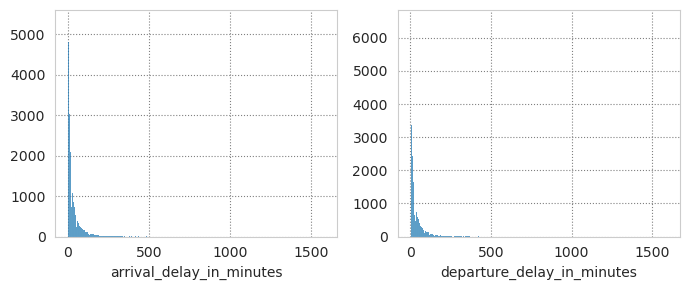

In [17]:
x1=data[data['arrival_delay_in_minutes']>0]['arrival_delay_in_minutes']
x2=data[data['departure_delay_in_minutes']>0]['departure_delay_in_minutes']

fig,ax = plt.subplots(1,2, figsize=(7,3))
sns.histplot(x=x1, ax=ax[0]).set(ylabel='')
sns.histplot(x=x2, ax=ax[1]).set(ylabel='')
plt.tight_layout()
plt.savefig('../plots/delay_distribution.png', dpi=300)
plt.show()

#### Show rating by flight class

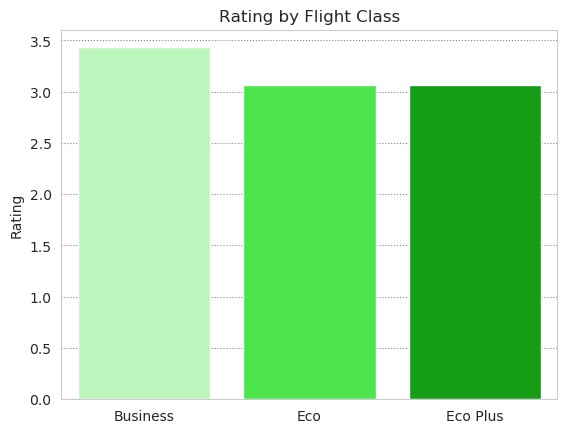

In [18]:
grp = data.pivot_table(index='class', values='rating_avg').reset_index()
sx = sns.barplot(data=grp, y='rating_avg', x='class', palette=['#b3ffb3', '#33ff33', '#00b300'])
sx.set(title='Rating by Flight Class', xlabel='', ylabel='Rating')
plt.savefig('../plots/rating_by_class.png', dpi=300)
plt.show()

#### Show rating by age

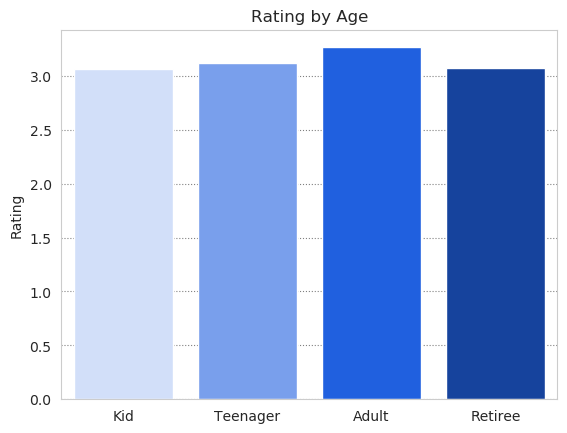

In [19]:
grp = data.pivot_table(index='generation', values='rating_avg').reset_index()
sx = sns.barplot(data=grp, y='rating_avg', x='generation',
                 palette=['#ccddff', '#6699ff', '#0055ff', '#003cb3'],
                 order=['Kid', 'Teenager', 'Adult', 'Retiree'])
sx.set(title='Rating by Age', xlabel='', ylabel='Rating')
plt.savefig('../plots/rating_by_age.png', dpi=300)
plt.show()

#### Show rating by flight distance

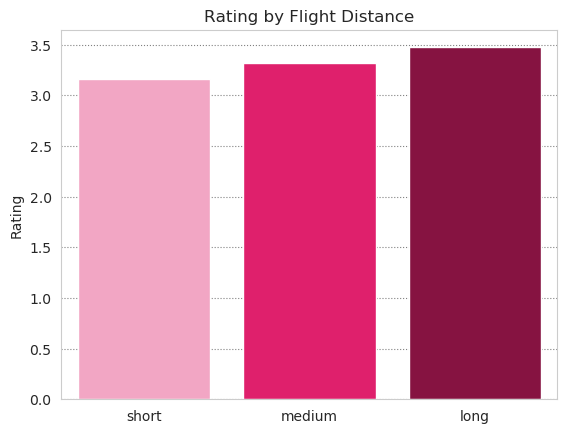

In [28]:
grp = data.pivot_table(index='flight_distance_class', values='rating_avg').reset_index()
sx = sns.barplot(data=grp, y='rating_avg', x='flight_distance_class',
                 palette=['#ff99c2', '#ff0066', '#99003d'],
                 order=['short', 'medium', 'long'])
sx.set(title='Rating by Flight Distance', xlabel='', ylabel='Rating')
plt.savefig('../plots/rating_by_distance.png', dpi=300)
plt.show()

#### Show rating by travel type

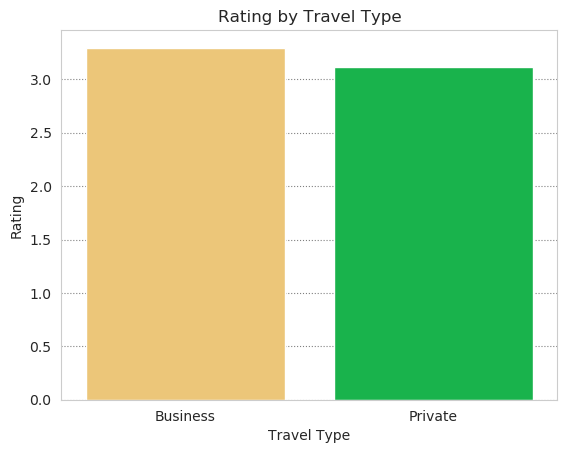

In [21]:
grp = data.pivot_table(index='type_of_travel', values='rating_avg').reset_index()
sx = sns.barplot(x=grp['type_of_travel'], y=grp['rating_avg'], palette=['#ffcc66', '#00cc44'])
sx.set(title='Rating by Travel Type', ylabel='Rating', xlabel='Travel Type')
plt.savefig('../plots/rating_by_travel_type.png', dpi=300)
plt.show()

#### Show rating by customer type

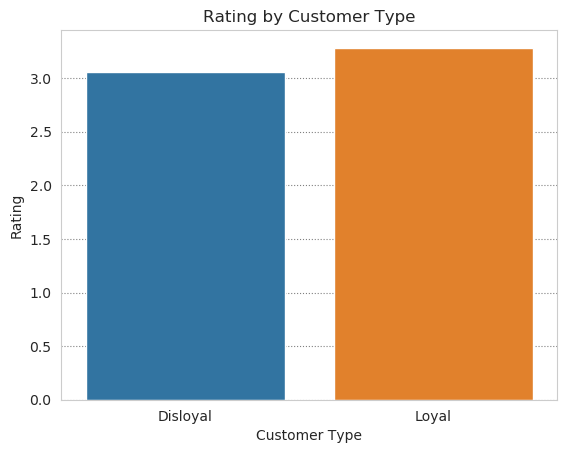

In [22]:
grp = data.pivot_table(index='customer_type', values='rating_avg').reset_index()
sx = sns.barplot(x=grp['customer_type'], y=grp['rating_avg'])
sx.set(title='Rating by Customer Type', ylabel='Rating', xlabel='Customer Type')
plt.savefig('../plots/rating_by_customer_type.png', dpi=300)
plt.show()

#### Show rating by gender

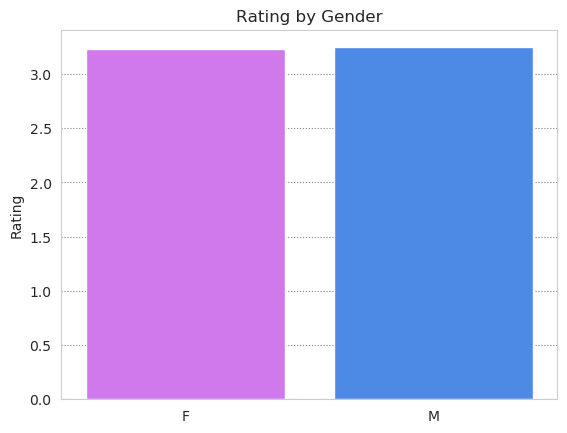

In [26]:
grp = data.pivot_table(index='gender', values='rating_avg').reset_index()
sx = sns.barplot(x=grp['gender'], y=grp['rating_avg'], palette=['#d966ff', '#3385ff'])
sx.set(title='Rating by Gender', ylabel='Rating', xlabel='')
plt.savefig('../plots/rating_by_gender.png', dpi=300)
plt.show()

### Which features are rated best/worst ?

/home/peilnix/.local/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


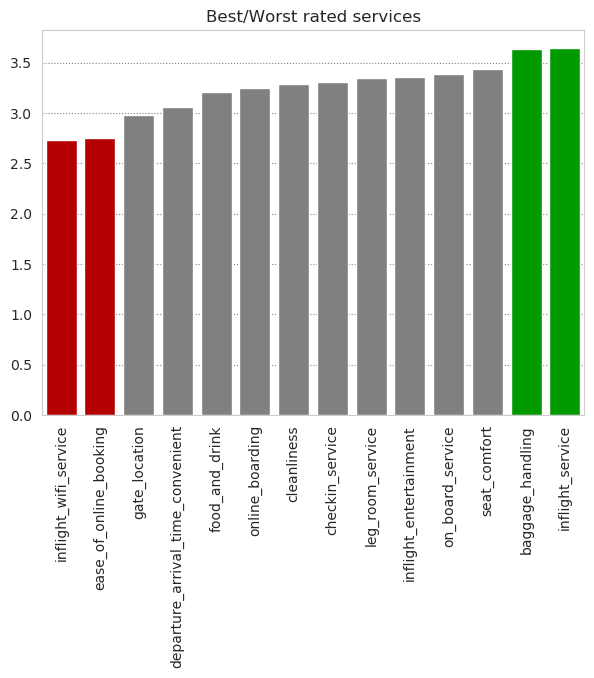

In [27]:
d = {}
for col in rate_cols:
    d[col] = [data[col].mean()]

grp = pd.DataFrame(d).T.sort_values(by=0).T

plt.subplots(figsize=(7,5))
sx = sns.barplot(grp, palette=['grey']*14)
sx.set(title='Best/Worst rated services')

sx.patches[0].set_facecolor('#b30000')
sx.patches[1].set_facecolor('#b30000')

sx.patches[12].set_facecolor('#009900')
sx.patches[13].set_facecolor('#009900')

plt.xticks(rotation=90)
plt.savefig('../plots/best_worst_rated.png', dpi=300)
plt.show()

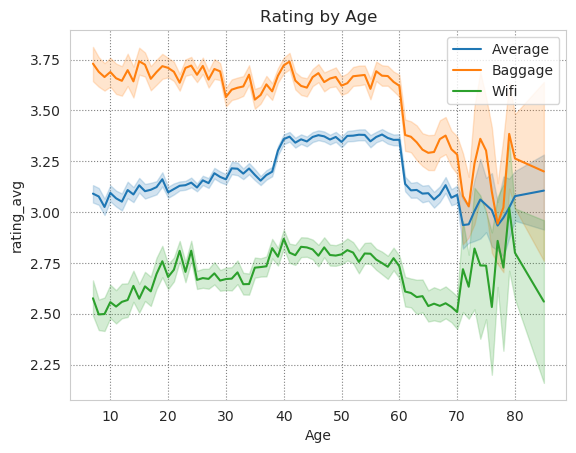

In [55]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sx = sns.lineplot(x=data['age'], y=data['rating_avg'], legend='brief', label='Average')
sx = sns.lineplot(x=data['age'], y=data['baggage_handling'], legend='brief', label='Baggage')
sx = sns.lineplot(x=data['age'], y=data['inflight_wifi_service'], legend='brief', label='Wifi')


sx.set(title='Rating by Age', xlabel='Age')
plt.savefig('../plots/different_rating_by_age.png', dpi=300)
plt.show()


### Store exploration set to file

In [25]:
data.to_csv(config['data']['explore'], index=False)